# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


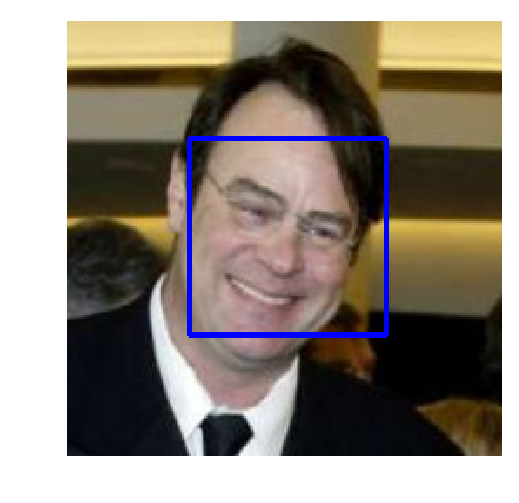

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.axis("off")
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

As seen below, the classifier detects 98% of human faces on fotos of humans and 17% of dogs with a face :)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

    
def count_detection_percentages(files_list):
    """    
    Args: A list of files = files_list
    Returns: number of detected faces, length of files_list
    Requires: face_detector from Open CV
    
    """
    
    detected_faces = 0.
    for path in tqdm(files_list):
        detected_faces += face_detector(path)
    return detected_faces, len(files_list)


In [5]:
human_faces, length = count_detection_percentages(human_files_short)
print(f"Detected {human_faces/length*100}% human faces.")

100%|██████████| 100/100 [00:02<00:00, 33.92it/s]

Detected 98.0% human faces.


In [6]:
dog_faces, length = count_detection_percentages(dog_files_short)
print(f"Detected {dog_faces/length*100}% dog faces.")

100%|██████████| 100/100 [00:29<00:00,  7.33it/s]

Detected 17.0% dog faces.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

def count_smiles_percentages(files_list):
    
    smile_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')
    
    def smile_detector(img_path):
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        smiles = smile_cascade.detectMultiScale(gray)
        return len(smiles) > 0
    
    smiles = [smile_detector(path) for path in tqdm(files_list)]
    smiles = np.sum(smiles)
    
    return smiles, len(files_list)


In [8]:
human_smiles, length = count_smiles_percentages(human_files_short)
print(f"Detected {human_smiles/length*100}% human smiles.")

100%|██████████| 100/100 [00:03<00:00, 29.91it/s]


Detected 100.0% human smiles.


In [9]:
dog_smiles, length = count_detection_percentages(dog_files_short)
print(f"Detected {dog_smiles/length*100}% dog smiles.")

100%|██████████| 100/100 [00:28<00:00,  7.36it/s]

Detected 17.0% dog smiles.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda() 

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 99627453.00it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [11]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # VGG16 accepts 224*224 input tensors
    data_transformation = transforms.Compose([transforms.Resize((224,224)),
                                              transforms.ToTensor()])
    # load image, change to tensor and may move to gpu
    img = Image.open(img_path)
    img = data_transformation(img)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    # evaluate the image in VGG16 and obtain top class
    prediction = VGG16(img)
    top_prob, top_class = prediction.topk(1, dim=1)

    return top_class # predicted class index

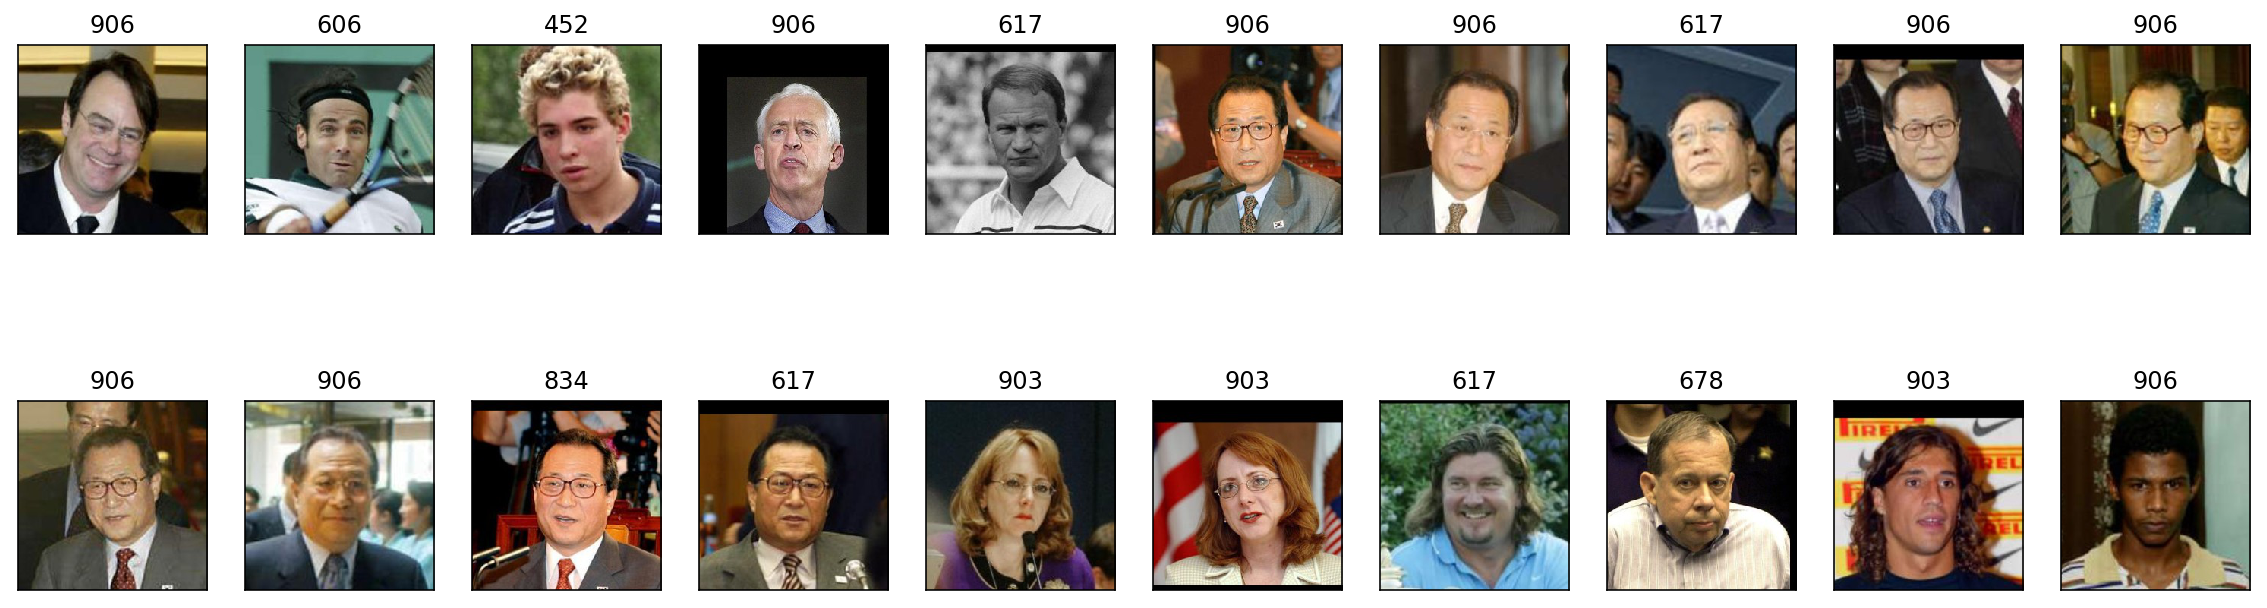

In [12]:
# this cell is to extract the last 20 files from the human file list
example_files = human_files_short[:20]

# obtain class labels from VGG16 for the 20 images
top_classes = []
for idx, file in enumerate(example_files):
    predicted_class = VGG16_predict(file)
    # convert tensor data type to numpy types to accumulate in top_classes list
    predicted_class = np.squeeze(predicted_class.numpy()) if not use_cuda else np.squeeze(predicted_class.cpu().numpy())
    top_classes.append(predicted_class)
    
# visualise images with respective class labels from VGG16
fig = plt.figure(figsize=(20,6))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    image = cv2.imread(example_files[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    ax.set_title(f"{top_classes[idx]}")

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    ## TODO: Complete the function.
    """Call the VGG16_predict function from above, return a predicted class label
    and check if prediction is a dog.
    
    Args: img_path = directory of input image
    Returns: True or False 
    """
    
    predicted_class = VGG16_predict(img_path)
    if (predicted_class >= 151) and (predicted_class <= 268):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Not a single human is luckily detected as a dog. 
95% of dogs are seen as dogs by VGG16.

In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_humans_as_dogs = 0.
for image_path in tqdm(human_files_short):
    detected_humans_as_dogs += dog_detector(image_path)
    
    
print(f"Detected {detected_humans_as_dogs/len(human_files_short)*100}% of humans as dogs.")


100%|██████████| 100/100 [00:03<00:00, 31.09it/s]

Detected 0.0% of humans as dogs.


In [15]:
detected_dogs_as_dogs = 0.
for image_path in tqdm(dog_files_short):
    detected_dogs_as_dogs += dog_detector(image_path)
    
print(f"Detected {detected_dogs_as_dogs/len(dog_files_short)*100}% of dogs as dogs.")

100%|██████████| 100/100 [00:04<00:00, 22.67it/s]

Detected 95.0% of dogs as dogs.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

VGG19 = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:06<00:00, 85201051.13it/s]


In [17]:
if use_cuda:
    VGG19 = VGG19.cuda()
    
def predict_vgg19(img_path):
    
    transformation = transforms.Compose([transforms.Resize((224,224)), 
                                         transforms.ToTensor()])
    img = Image.open(img_path)
    img = transformation(img)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    
    pred = VGG19(img)
    _, top_class = pred.topk(1, dim=1)
    return top_class


def dog_detector_vgg19(img_path):

    predicted_class = predict_vgg19(img_path)
    if (predicted_class >= 151) and (predicted_class <= 268):
        return True
    else:
        return False

In [18]:
detected_dogs = [dog_detector_vgg19(path) for path in tqdm(dog_files_short)]
detected_dogs = np.sum(detected_dogs)
detected_dogs_percent = detected_dogs/len(dog_files_short)*100
print("Detected {}% of dogs using VGG19".format(detected_dogs))

100%|██████████| 100/100 [00:05<00:00, 19.90it/s]

Detected 98% of dogs using VGG19


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import torch
import numpy as np
import os
from torchvision import datasets, models, transforms
import torchvision
import torch.nn as nn
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

# transforms including data augmentation for training data
transforms_t = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224, 0.225])])

# transforms for validating and testing without the use of data augmentation
transforms_validtest = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])

# import the datasets with torch's DataFolder function
train_dataset = torchvision.datasets.ImageFolder("/data/dog_images/train", transform=transforms_t)
valid_dataset = torchvision.datasets.ImageFolder("/data/dog_images/valid", transform=transforms_validtest)
test_dataset  = torchvision.datasets.ImageFolder("/data/dog_images/test", transform=transforms_validtest)

# load data into iterable data loaders
complete_loader = dict()
complete_loader['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)
complete_loader['valid'] = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)
complete_loader['test']  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)

In [20]:
complete_loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f40580f02e8>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f40580f0358>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f40580f0390>}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Images were resized to 224*224 inputs to fit the VGG16 requirements. Data augmentation is used for the training and validation data, but not for the test data to keep actual testing images for user input in their natural shape. Resizing was done by randomly cropping in the transforms_tv (tv = train_and_validate) imports. Moreover, train/val images are randomly flipped and rotated with a 10 degree angle. Maybe on a small dataset like we have here, that is complicated enough for the network to learn, data augmentation (which aims to reduce overfitting but not necessarily increases prediction accuracy might overcomplicate things for the network) might not always prove useful in this case.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [37]:
train_iter = iter(complete_loader["train"])
images, labels = train_iter.next()
images = images.numpy()
in_size = images.shape[3]

In [64]:
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()


# define the CNN architecture
class Dog_Breed_Net(nn.Module):
    
    ### TODO: choose an architecture, and complete the class
    
    def __init__(self):
        super(Dog_Breed_Net, self).__init__()
        ## Define layers of a CNN
        
        def conv_out_size(in_size=in_size, kernel_size=3, stride=1, padding=1):
            for _ in range(5):
                out_size = ((in_size - kernel_size + 2*padding) // stride + 1) / self.maxpool.stride
                in_size = out_size
            return out_size
        
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, stride=1, padding=1)        
        
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.batchnorm4 = nn.BatchNorm2d(128)
        self.batchnorm5 = nn.BatchNorm2d(256)
        
        self.maxpool = nn.MaxPool2d(2,2)
        
        conv_out_x = conv_out_size()
        conv_out_y = conv_out_size()
        conv_out_depth = 256
        
        self.size = conv_out_x * conv_out_y * conv_out_depth

        self.fc1 = nn.Linear(self.size, 400)
        self.fc2 = nn.Linear(400, 133)
        self.dropout = nn.Dropout(p=0.25)
        
        
    def forward(self, x):
        ## Define forward behavior
        x = self.batchnorm1(self.maxpool(F.relu(self.conv1(x))))
        x = self.batchnorm2(self.maxpool(F.relu(self.conv2(x))))
        x = self.batchnorm3(self.maxpool(F.relu(self.conv3(x))))
        x = self.batchnorm4(self.maxpool(F.relu(self.conv4(x))))
        x = self.batchnorm5(self.maxpool(F.relu(self.conv5(x))))
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model = Dog_Breed_Net()


# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()

In [65]:
print(model)

Dog_Breed_Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

This model is composed of a total of 5 convolutional layers, including a kernel_size of 3 and stride of 1 with padding of 1, thus maintaining the original image sizes. These are downsampled applying a MaxPool2d layer after each ConvLayer to reduce xy-dimensions by a factor of 2 after each image. All convolutional layer outputs are normalized by a batchnorm layer. While xy-dimensions are downsampled, the depth of the generated feature maps is increasing from an initial 3 (RGB color channels) to a total of 256. After passing through the Conv2d layers sequentially, a hidden linear layer outputting 400 parameters is added, data is passed through a dropout layer with a 25% probability of shutting down neurons while training to reduce overfitting and fed into a final linear output layer, that outputs the 133 target classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [66]:
### TODO: select loss function
criterion = nn.CrossEntropyLoss()

### TODO: select optimizer function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [69]:
N_EPOCHS = 25
SAVE_PATH = "model_scratch.pt"

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs = N_EPOCHS,
          model = model,
          loader = complete_loader, 
          optimizer = optimizer,
          criterion = criterion,
          use_cuda = use_cuda,
          save_path = SAVE_PATH):
    
    train_losses = []
    valid_losses = []
    accuracies   = []
    
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        
        train_loss = 0.
        valid_loss = 0.
        accuracy   = 0.
        
        model.train()
        for batch, (images, labels) in enumerate(complete_loader["train"]):
            
            if use_cuda:
                images, labels = images.cuda(), labels.cuda()
                
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += ((1 / (batch + 1)) * (loss.data - train_loss))
        
        
        with torch.no_grad():
            model.eval()
            for batch, (images, labels) in enumerate(complete_loader["valid"]):
                
                if use_cuda:
                    images, labels = images.cuda(), labels.cuda()
                    
                output = model(images)
                loss = criterion(output, labels)
                valid_loss += ((1 / (batch + 1)) * (loss.data - valid_loss))
                
                _, top_class = output.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        accuracies.append(accuracy)
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
        
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    return model, train_losses, valid_losses, accuracies
        

In [70]:
model, train_losses, valid_losses, accuracies = train()

Epoch: 1 	Training Loss: 4.018785 	Validation Loss: 3.822997
Validation loss decreased (inf --> 3.822997).  Saving model ...
Epoch: 2 	Training Loss: 3.927072 	Validation Loss: 3.798068
Validation loss decreased (3.822997 --> 3.798068).  Saving model ...
Epoch: 3 	Training Loss: 3.870072 	Validation Loss: 3.702335
Validation loss decreased (3.798068 --> 3.702335).  Saving model ...
Epoch: 4 	Training Loss: 3.796878 	Validation Loss: 3.766709
Epoch: 5 	Training Loss: 3.731289 	Validation Loss: 3.624377
Validation loss decreased (3.702335 --> 3.624377).  Saving model ...
Epoch: 6 	Training Loss: 3.707453 	Validation Loss: 3.558292
Validation loss decreased (3.624377 --> 3.558292).  Saving model ...
Epoch: 7 	Training Loss: 3.623405 	Validation Loss: 3.441498
Validation loss decreased (3.558292 --> 3.441498).  Saving model ...
Epoch: 8 	Training Loss: 3.569177 	Validation Loss: 3.447486
Epoch: 9 	Training Loss: 3.539170 	Validation Loss: 3.441680
Epoch: 10 	Training Loss: 3.496516 	Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

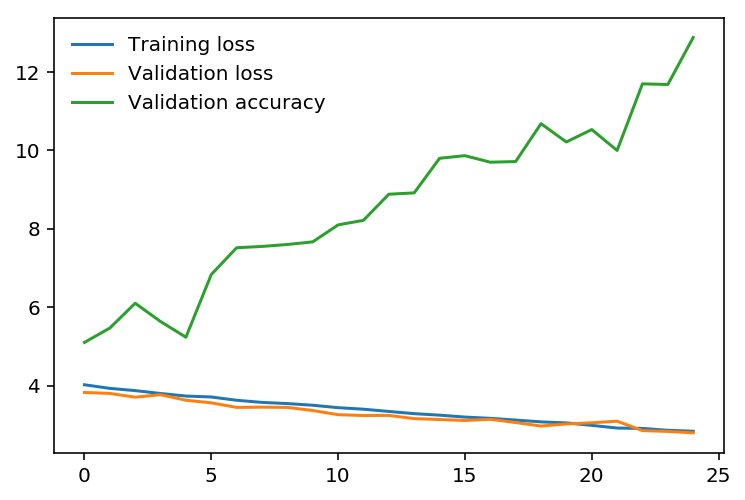

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

plt.plot(train_losses, label="Training loss")
plt.plot(valid_losses, label="Validation loss")
plt.plot(accuracies, label="Validation accuracy")
plt.legend(frameon=False)

In [72]:
model.load_state_dict(torch.load("model_scratch.pt"))

def test(complete_loader, model, criterion, use_cuda):
    
    test_loss = 0.
    correct = 0.
    total = 0.
    
    model.eval()
    for batch, (images, labels) in enumerate(complete_loader["test"]):
        
        if use_cuda:
            images, labels = images.cuda(), labels.cuda()
            
        output = model(images)
        loss = criterion(output, labels)
        test_loss += ((1 / (batch +1)) * (loss.data - test_loss))
        
        _, pred = output.topk(1, dim=1)
        correct += np.sum(np.squeeze(pred.eq(labels.data.view_as(pred))).cpu().numpy())
        total += images.size(0)
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %3d%% (%2d/%2d)' % (100. * correct / total, correct, total))
    
    
test(complete_loader, model, criterion, use_cuda)


Test Loss: 2.705705


Test Accuracy:  31% (262/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [73]:
batch_size = 20
num_workers = 0

# transforms including data augmentation for training data
transforms_t = transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomRotation(10),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224, 0.225])])

# transforms for validating and testing without the use of data augmentation
transforms_validtest = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])

# import the datasets with torch's DataFolder function
train_dataset = torchvision.datasets.ImageFolder("/data/dog_images/train", transform=transforms_t)
valid_dataset = torchvision.datasets.ImageFolder("/data/dog_images/valid", transform=transforms_validtest)
test_dataset  = torchvision.datasets.ImageFolder("/data/dog_images/test", transform=transforms_validtest)

# load data into iterable data loaders
complete_loader = dict()
complete_loader['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)
complete_loader['valid'] = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)
complete_loader['test']  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers,
                                                      shuffle=True)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [74]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = torchvision.models.densenet161(pretrained=True)

# replace last layer with own Linear layer that returns 133 classes
features = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(features, 133, bias=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


In [75]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

To get to my final CNN architecture for transfer learning, I downloaded Densenet161, which has performed good results on the ImagNet database. I then froze the parameters of the feature extraction layers, that do not need to get updated. As ImageNet contains several classes of dogs as well, I would consider the new dataset to share some similarities with the images of dogs that Densenet has already seen, thus retraining from scratch or updating all weights would maybe not drastically improve my performce, however be very time intensely. I then trained the last classification layer for 15 epochs with randomly initialised weights using CrossEntropyLoss (as we have a multiclass classification task) with Adam Optimizer.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [76]:
criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.classifier.parameters(), lr=0.004)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [77]:
# train the model

model_transfer, train_losses, valid_losses, accuracies = train( n_epochs = 15,
                                                                model = model_transfer, 
                                                                loader = complete_loader, 
                                                                optimizer = optimizer_transfer,
                                                                criterion = criterion_transfer,
                                                                use_cuda = use_cuda,
                                                                save_path = "model_transfer.pt" )

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.351731 	Validation Loss: 0.873676
Validation loss decreased (inf --> 0.873676).  Saving model ...
Epoch: 2 	Training Loss: 1.433793 	Validation Loss: 0.795772
Validation loss decreased (0.873676 --> 0.795772).  Saving model ...
Epoch: 3 	Training Loss: 1.405119 	Validation Loss: 0.923720
Epoch: 4 	Training Loss: 1.378160 	Validation Loss: 0.773938
Validation loss decreased (0.795772 --> 0.773938).  Saving model ...
Epoch: 5 	Training Loss: 1.343441 	Validation Loss: 0.759787
Validation loss decreased (0.773938 --> 0.759787).  Saving model ...
Epoch: 6 	Training Loss: 1.259243 	Validation Loss: 0.763073
Epoch: 7 	Training Loss: 1.386371 	Validation Loss: 0.783470
Epoch: 8 	Training Loss: 1.317248 	Validation Loss: 0.784762
Epoch: 9 	Training Loss: 1.275553 	Validation Loss: 0.937075
Epoch: 10 	Training Loss: 1.315086 	Validation Loss: 0.842871
Epoch: 11 	Training Loss: 1.295376 	Validation Loss: 0.756658
Validation loss decreased (0.759787 --> 0.756658).  Savi

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [78]:
test(complete_loader, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.879799


Test Accuracy:  82% (692/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [80]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

class_names = [item[4:].replace("_", " ") for item in complete_loader['train'].dataset.classes]

def predict_breed_transfer(img_path, model, use_cuda, class_names):
    # load the image and return the predicted breed
    
    transformation_presets = transforms.Compose([transforms.Resize(256),
                                               transforms.CenterCrop(224),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])
    
    img = Image.open(img_path)
    img = transformation_presets(img)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
        
    output = model(img)
    probability, prediction = torch.max(output, 1)
    
    predict = np.squeeze(prediction.numpy()) if not use_cuda else np.squeeze(prediction.cpu().numpy())
        
    return class_names[predict]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [81]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    print("Welcome to this App!")
    
    if dog_detector(img_path):
        breed = predict_breed_transfer(img_path, model_transfer, use_cuda, class_names)
        figure_title = f"Hello Dog. You like like you are a {breed}."
    
    elif face_detector(img_path):
        resemblind_breed = predict_breed_transfer(img_path, model_transfer, use_cuda, class_names)
        figure_title = f"Hi Human. If you were a dog you'd be a {resemblind_breed}."
        
    else:
        figure_title = "I dont know who you are, but you are neither human nor a dog. Sorry !"
        
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(figure_title)
    plt.show()
    
    print("Thanks for using my app.")
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Globally, the output of the model is well, as it includes a heavily pretrained network (DenseNet161).
Possible points for improvements would include:
1. More datasets on dog images, as accuracy was "only" around 82% on correctly classifiying dog breeds.
2. Use grid-search for hyperparameter optimization.
3. Use more image augmentation techniques like rotate, flip, etc.
4. Retrain the whole model for finetuning the model weights (if theres enough GPU)...

Welcome to this App!


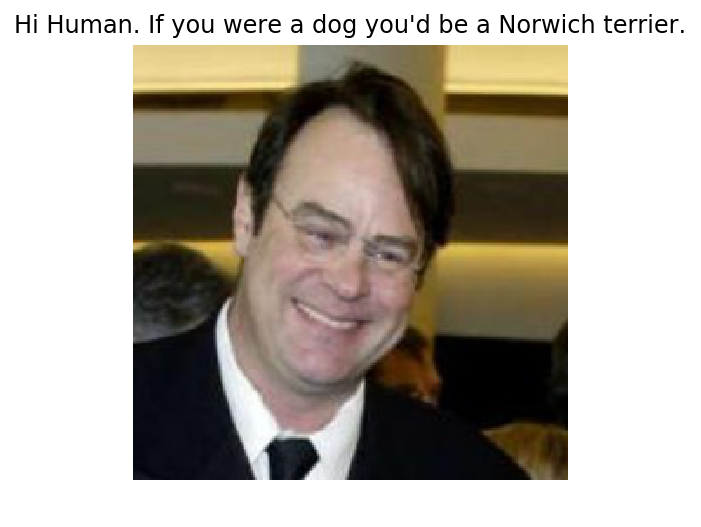

Thanks for using my app.
Welcome to this App!


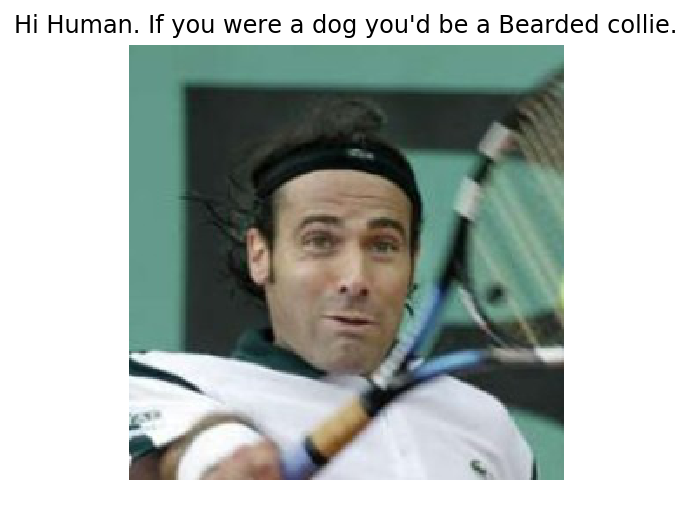

Thanks for using my app.
Welcome to this App!


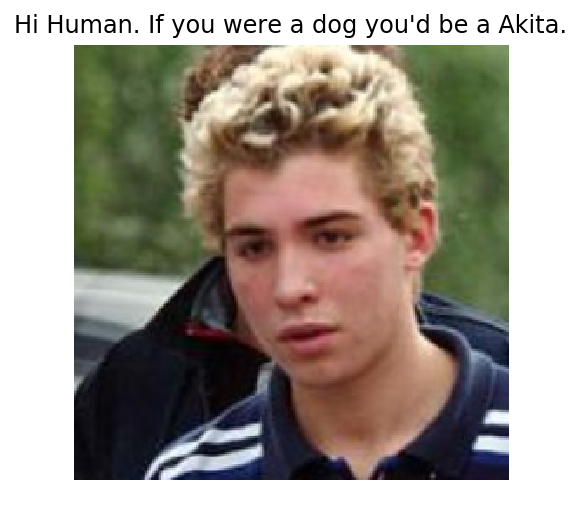

Thanks for using my app.
Welcome to this App!


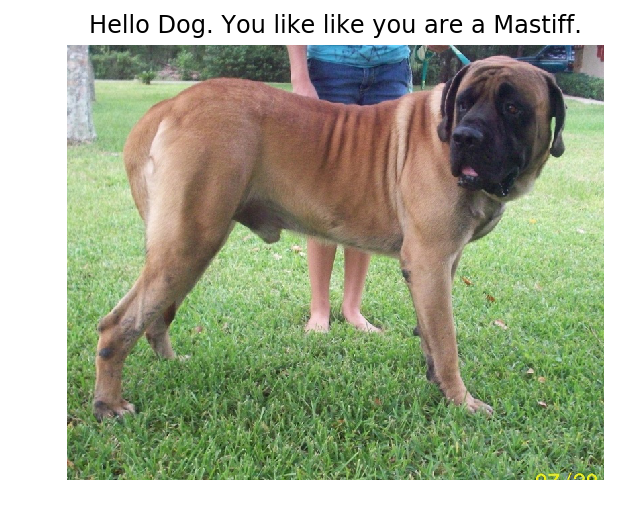

Thanks for using my app.
Welcome to this App!


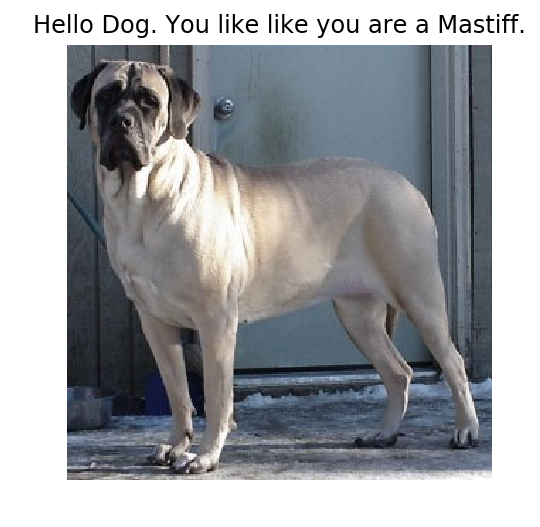

Thanks for using my app.
Welcome to this App!


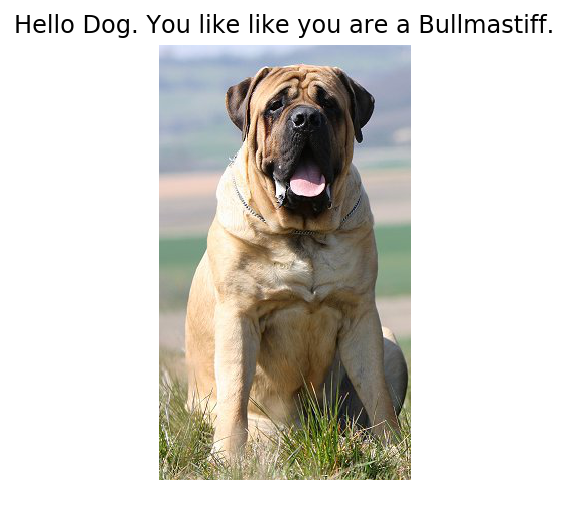

Thanks for using my app.


In [82]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)